I thought it would be useful to evaluate the results of the categories script.

# Initial Loading and Setup

This is just some initial setup. You can ignore this.

In [4]:
%run '/home/jscharf/Research/polisciresearch/Scripts/Categorize.py'

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

#Read categories file
with open('/home/jscharf/Research/polisciresearch/misc/categories.json', 'r') as f:
    orig_cats = json.load(f)
    
%matplotlib inline

In [12]:
purDF = pd.read_csv("../../data/purposecodes.csv")
purDF.head(1000)

pay                  namefix3     can_id  \
0                  AL-HADDAD, USAMA            ALHADDAD USAMA  P80001571   
1     MCCARTHY HENNINGS WHALEN INC.  MCCARTHY HENNINGS WHALEN  S4IA00087   
2     MCCARTHY HENNINGS WHALEN INC.  MCCARTHY HENNINGS WHALEN  S4IA00087   
3                      #ALLOFUS2016               ALLOFUS2016              
4                         , ADCRAFT                   ADCRAFT              
5                              , LE                        LE              
6                             , RED                       RED              
7           00002L, USW LOCAL UNION    00002L USW LOCAL UNION  P80003338   
8           00002L, USW LOCAL UNION    00002L USW LOCAL UNION  P80003338   
9            01375, USW LOCAL UNION     01375 USW LOCAL UNION  P80003338   
10           01375, USW LOCAL UNION     01375 USW LOCAL UNION  P80003338   
11           05644, USW LOCAL UNION     05644 USW LOCAL UNION  P80003338   
12           05644, USW LOCAL UNION     05644 USW LOCAL UNION  P80003338   
13                 1 GOAL CAMPAIGNS          1 GOAL CAMPAIGNS  S6FL00426   
14                 1 GOAL CAMPAIGNS          1 GOAL CAMPAIGNS  S6FL00426   
15                 1 GOAL CAMPAIGNS          1 GOAL CAMPAIGNS  S6FL00426   
16                          1 MIAMI                   1 MIAMI  H2FL27014   
17                          1 MIAMI                   1 MIAMI  H8FL25015   
18                          1 MIAMI                   1 MIAMI  P80003338   
19                          1 MIAMI                   1 MIAMI  P80003338   
20                          1 MIAMI                   1 MIAMI  P80003338   
21                          1 MIAMI                   1 MIAMI  P80003338   
22                          1 MIAMI                   1 MIAMI  P80003353   
23                          1 MIAMI                   1 MIAMI  P80003353   
24                          1 MIAMI                   1 MIAMI  P80003353   
25                          1 MIAMI                   1 MIAMI  S8FL00166   
26                          1 MIAMI                   1 MIAMI  S8FL00166   
27         100 WILLIAM GARAGE CORP.        100 WILLIAM GARAGE  P60007168   
28         100 WILLIAM GARAGE CORP.        100 WILLIAM GARAGE  P60007168   
29         100 WILLIAM GARAGE CORP.        100 WILLIAM GARAGE  P60007168   
..                              ...                       ...        ...   
970              720 STRATEGIES LLC            720 STRATEGIES  S2TX00106   
971              720 STRATEGIES LLC            720 STRATEGIES  S2TX00106   
972              720 STRATEGIES LLC            720 STRATEGIES  S6AL00013   
973              720 STRATEGIES LLC            720 STRATEGIES  S6AL00013   
974              720 STRATEGIES LLC            720 STRATEGIES  S6AL00013   
975              720 STRATEGIES LLC            720 STRATEGIES  S6GA00119   
976              720 STRATEGIES LLC            720 STRATEGIES  S6GA00119   
977              720 STRATEGIES LLC            720 STRATEGIES  S6GA00119   
978              720 STRATEGIES LLC            720 STRATEGIES  S6KS00080   
979              720 STRATEGIES LLC            720 STRATEGIES  S6KS00080   
980              720 STRATEGIES LLC            720 STRATEGIES  S6NV00218   
981              720 STRATEGIES LLC            720 STRATEGIES  S6NV00218   
982              720 STRATEGIES LLC            720 STRATEGIES  S8AK00090   
983              720 STRATEGIES LLC            720 STRATEGIES  S8CO00172   
984              720 STRATEGIES LLC            720 STRATEGIES  S8CO00172   
985              720 STRATEGIES LLC            720 STRATEGIES  S8MS00055   
986              720 STRATEGIES LLC            720 STRATEGIES  S8MS00055   
987              720 STRATEGIES LLC            720 STRATEGIES  S8MS00055   
988              720 STRATEGIES LLC            720 STRATEGIES  S8MS00055   
989              720 STRATEGIES LLC            720 STRATEGIES  S8MS00055   
990              720 STRATEGIES LLC            720 STRATEGIES  S8MS00055   
991 

In [7]:
#Generate a new data set which includes probabilities
purNew = catToColumns(purDF, "pur", orig_cats)
#Make date object
purNew.date = pd.to_datetime(purNew.date)

KeyboardInterrupt: 

In [ ]:
purNew.head(20)

## 2010

If we order the whole set by date, we should be able to see total spending in each category across all election years.

In [22]:
pur2010 = purNew[purNew["election"] == 2010]
pur2010 = pur2010[pur2010["date"] < pd.to_datetime("2010-11-02")]
pur2010 = pur2010.sort_values(by=["date"])

## Media

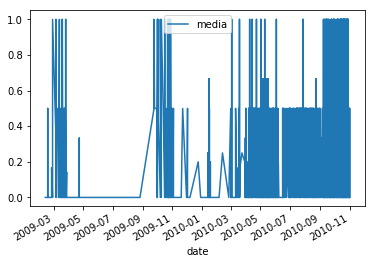

In [24]:
pur2010.plot(x = 'date', y = 'media')